# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
import json
import requests
from config import wkey
from pprint import pprint
from citipy import citipy
import numpy as np
import pandas as pd
from numpy import random
from matplotlib import pyplot as plt
from scipy.stats import linregress
from sklearn import datasets
from datetime import date

url = "http://api.openweathermap.org/data/2.5/weather?"

## Generate Cities List

In [2]:
#lists creation
latlst = []
lnglst = []
citylst = []
maxtemp = []
humidity = []
clouds = []
wind = []
country = []
dates = []

today = date.today()

# dd/mm/YY
d1 = today.strftime("%d/%m/%y")

In [3]:
#While loop will creates city name only if it can be found in the weather API.

i = 0
#500 samples
while i<500:
    #random latitude and longitude
    lat = random.randint(180)-90
    lng = random.randint(360)-180
    city = citipy.nearest_city(lat,lng)
    city = city.city_name
    #checks if city is in list
    if city not in citylst:
        try:
            #if city is in list, it checks if it can be found in weather api. If not, it will generate another set of
            #random coordinates and search again
            #Weather check
            query_url = url + "appid=" + wkey + "&q=" + city
            weather_response = requests.get(query_url)
            weather_json = weather_response.json()
            base = weather_json['base']
            citylst.append(city)
            latlst.append(weather_json['coord']['lat'])
            lnglst.append(weather_json['coord']['lon'])
            maxtemp.append(weather_json['main']['temp_max'])
            humidity.append(weather_json['main']['humidity'])
            clouds.append(weather_json['clouds']['all'])
            wind.append(weather_json['wind']['speed'])
            country.append(weather_json['sys']['country'])
            dates.append(weather_json['dt'])
            print(i)
            i=i+1
        except:
            pass

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

In [14]:
#City List
print(len(citylst))
citylst

500


['broome',
 'creston',
 'provideniya',
 'polyarnyy',
 'albany',
 'busselton',
 'guerrero negro',
 'ixtapa',
 'amazar',
 'trincomalee',
 'avarua',
 'alofi',
 'victoria',
 'rikitea',
 'yangambi',
 'vostok',
 'mataura',
 'barrow',
 'pyapon',
 'hermanus',
 'vaini',
 'balabac',
 'dera bugti',
 'kalmunai',
 'kuroiso',
 'deputatskiy',
 'tautira',
 'ushuaia',
 'chuy',
 'thompson',
 'airai',
 'grindavik',
 'lebu',
 'nyurba',
 'melo',
 'sao mateus',
 'tasiilaq',
 'lasem',
 'punta arenas',
 'port alfred',
 'kodiak',
 'leningradskiy',
 'georgetown',
 'bela',
 'itarema',
 'praia da vitoria',
 'catuday',
 'jvari',
 'ribeira grande',
 'la ronge',
 'clyde river',
 'ushtobe',
 'yellowknife',
 'fairbanks',
 'hobart',
 'predivinsk',
 'norden',
 'zhigansk',
 'sambava',
 'katsuura',
 'nome',
 'banjar',
 'bluefields',
 'severo-kurilsk',
 'severnoye',
 'ewa beach',
 'zaysan',
 'mehamn',
 'qaanaaq',
 'saldanha',
 'kumluca',
 'naze',
 'arraial do cabo',
 'tuktoyaktuk',
 'qasigiannguit',
 'cabo san lucas',
 'at

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [15]:
for i in range(len(citylst)):
    print(f"#{i}--{citylst[i]}")

#0--broome
#1--creston
#2--provideniya
#3--polyarnyy
#4--albany
#5--busselton
#6--guerrero negro
#7--ixtapa
#8--amazar
#9--trincomalee
#10--avarua
#11--alofi
#12--victoria
#13--rikitea
#14--yangambi
#15--vostok
#16--mataura
#17--barrow
#18--pyapon
#19--hermanus
#20--vaini
#21--balabac
#22--dera bugti
#23--kalmunai
#24--kuroiso
#25--deputatskiy
#26--tautira
#27--ushuaia
#28--chuy
#29--thompson
#30--airai
#31--grindavik
#32--lebu
#33--nyurba
#34--melo
#35--sao mateus
#36--tasiilaq
#37--lasem
#38--punta arenas
#39--port alfred
#40--kodiak
#41--leningradskiy
#42--georgetown
#43--bela
#44--itarema
#45--praia da vitoria
#46--catuday
#47--jvari
#48--ribeira grande
#49--la ronge
#50--clyde river
#51--ushtobe
#52--yellowknife
#53--fairbanks
#54--hobart
#55--predivinsk
#56--norden
#57--zhigansk
#58--sambava
#59--katsuura
#60--nome
#61--banjar
#62--bluefields
#63--severo-kurilsk
#64--severnoye
#65--ewa beach
#66--zaysan
#67--mehamn
#68--qaanaaq
#69--saldanha
#70--kumluca
#71--naze
#72--arraial do

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [16]:
citydata_df = pd.DataFrame({'City' : citylst,
                          'Lat' : latlst,
                          'Lng' : lnglst,
                          'Max Temp' : maxtemp,
                          'Humidity' : humidity,
                          'Cloudiness' : clouds,
                          'Wind Speed' : wind,
                          'Country' : country,
                          'Date' : dates
                          })
# Export file as a CSV, without the Pandas index, but with the header
citydata_df.to_csv("Output/CityData.csv", index=False, header=True)
citydata_df

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,broome,42.2506,-75.8330,295.63,86,90,0.89,US,1622070617
1,creston,41.0586,-94.3614,300.77,36,1,3.60,US,1622070617
2,provideniya,64.3833,-173.3000,281.21,53,0,10.00,RU,1622070618
3,polyarnyy,69.1989,33.4478,270.41,78,18,2.61,RU,1622070618
4,albany,42.6001,-73.9662,295.16,87,67,2.14,US,1622070321
...,...,...,...,...,...,...,...,...,...
495,nosy varika,-20.5833,48.5333,292.14,90,15,1.59,MG,1622070771
496,cap-aux-meules,47.3821,-61.8597,284.48,91,87,11.59,CA,1622070771
497,vozdvizhenka,43.9000,131.9500,286.01,70,100,3.17,RU,1622070772
498,saint-pierre,-21.3393,55.4781,293.97,85,0,2.57,RE,1622070772


In [17]:
citydata_df.describe()

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,5.000000e+02
mean,20.329564,18.875020,291.215300,70.190000,55.888000,3.478300,1.622071e+09
std,33.542183,92.581883,9.089212,22.355613,38.340833,2.513348,9.321022e+01
min,-54.800000,-175.200000,265.780000,5.000000,0.000000,0.000000,1.622070e+09
25%,-7.278600,-61.894425,284.410000,58.000000,17.000000,1.662500,1.622071e+09
50%,24.074300,27.138450,292.185000,77.000000,64.000000,2.760000,1.622071e+09
75%,47.516675,100.340125,298.650000,87.000000,96.000000,4.712500,1.622071e+09
max,78.218600,179.316700,312.270000,100.000000,100.000000,15.210000,1.622071e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,550.000000,550.000000,550.000000,550.000000,550.000000,550.000000,5.500000e+02
mean,19.973545,17.124400,58.331400,67.890909,52.141818,8.544800,1.585764e+09
std,33.284840,91.595451,25.795297,20.864881,35.766469,6.078869,5.539674e+01
min,-54.800000,-179.170000,-11.340000,9.000000,0.000000,0.160000,1.585764e+09
25%,-8.077500,-64.627500,42.800000,55.000000,20.000000,4.525000,1.585764e+09
50%,23.630000,19.635000,64.940000,72.000000,57.000000,7.325000,1.585764e+09
75%,48.672500,97.350000,78.800000,83.000000,86.750000,11.410000,1.585764e+09
max,78.220000,179.320000,102.200000,100.000000,100.000000,46.080000,1.585764e+09


In [17]:
#  Get the indices of cities that have humidity over 100%.


Int64Index([], dtype='int64')

In [19]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,butaritari,3.07,172.79,83.32,74,84,10.42,KI,1593605283
1,yerbogachen,61.28,108.01,79.52,58,20,7.70,RU,1593605121
2,cape town,-33.93,18.42,73.00,77,27,4.70,ZA,1593605039
3,touba,8.28,-7.68,79.97,75,82,3.58,CI,1593605284
4,jamestown,42.10,-79.24,64.00,88,1,6.93,US,1593605284


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

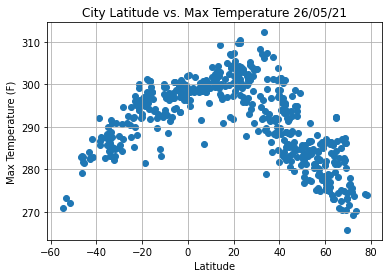

In [18]:
x_values = citydata_df['Lat']
y_values = citydata_df['Max Temp']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.title(f"City Latitude vs. Max Temperature {d1}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.show()

## Latitude vs. Humidity Plot

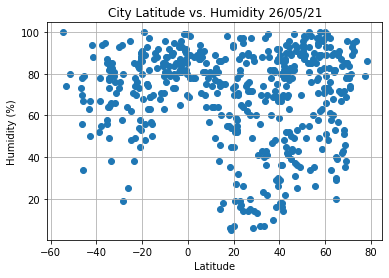

In [19]:
x_values = citydata_df['Lat']
y_values = citydata_df['Humidity']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.title(f"City Latitude vs. Humidity {d1}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.show()

## Latitude vs. Cloudiness Plot

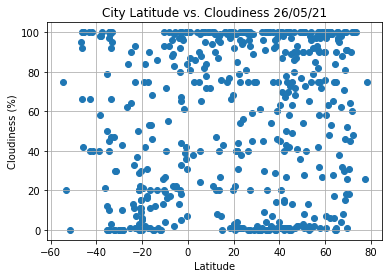

In [20]:
x_values = citydata_df['Lat']
y_values = citydata_df['Cloudiness']
plt.scatter(x_values,y_values)
plt.grid(True)
plt.title(f"City Latitude vs. Cloudiness {d1}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.show()

## Latitude vs. Wind Speed Plot

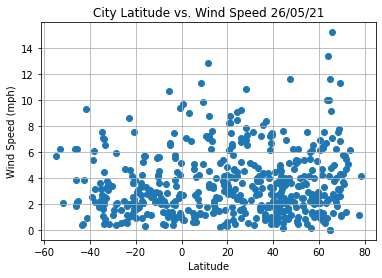

In [21]:
x_values = citydata_df['Lat']
y_values = citydata_df['Wind Speed']
plt.grid(True)
plt.scatter(x_values,y_values)
plt.grid(True)
plt.title(f"City Latitude vs. Wind Speed {d1}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

In [12]:
northernhemi_df = citydata_df.loc[(citydata_df["Lat"]>0),:]
southernhemi_df = citydata_df.loc[(citydata_df["Lat"]<0),:]

The r-value is: -0.811806369433954


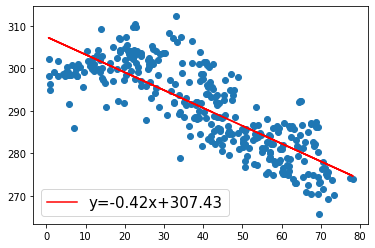

In [46]:
x_values = northernhemi_df['Lat']
y_values = northernhemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = regress_values = x_values * slope + intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.820834994908223


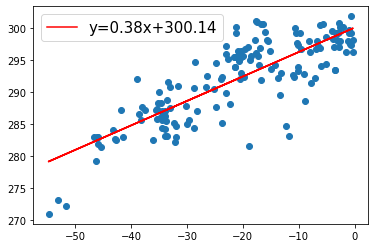

In [45]:
x_values = southernhemi_df['Lat']
y_values = southernhemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.09766922097859


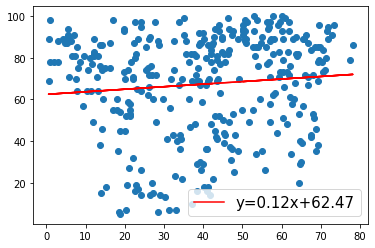

In [44]:
x_values = northernhemi_df['Lat']
y_values = northernhemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.31416714187804445


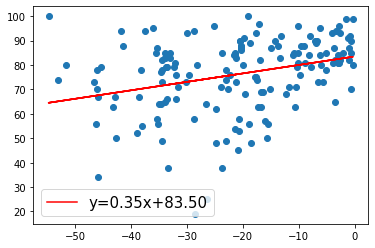

In [43]:
x_values = southernhemi_df['Lat']
y_values = southernhemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.057605787275775956


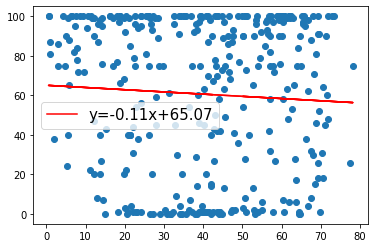

In [42]:
x_values = northernhemi_df['Lat']
y_values = northernhemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: -0.03923027142511674


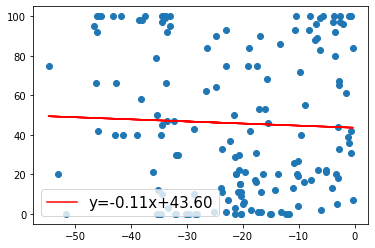

In [41]:
x_values = southernhemi_df['Lat']
y_values = southernhemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.020224875381679663


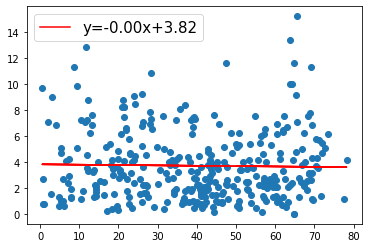

In [39]:
x_values = northernhemi_df['Lat']
y_values = northernhemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.029123763672319964


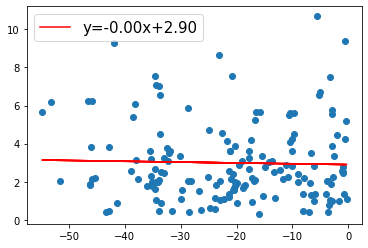

In [40]:
x_values = southernhemi_df['Lat']
y_values = southernhemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line = slope*x_values+intercept
plt.plot(x_values, line, 'r', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.legend(fontsize=15)
print(f"The r-value is: {rvalue}")
plt.show()